In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# EDA assignment
-->data anlysis on haberman dataset
**Description:-**
//4 variables 
//Surival staus 1--life span more than 5 years after surgery.
//2-life span less than 5 years after surgery.

**objective:-Perdict the survival status


In [3]:
haberman=pd.read_csv("haberman_survival_dataset.csv")
haberman.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(haberman.shape)
print(haberman.columns)

(306, 4)
Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')


In [5]:
haberman["Survival_status"].unique()

array([1, 2], dtype=int64)

C:\Users\Dell\anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


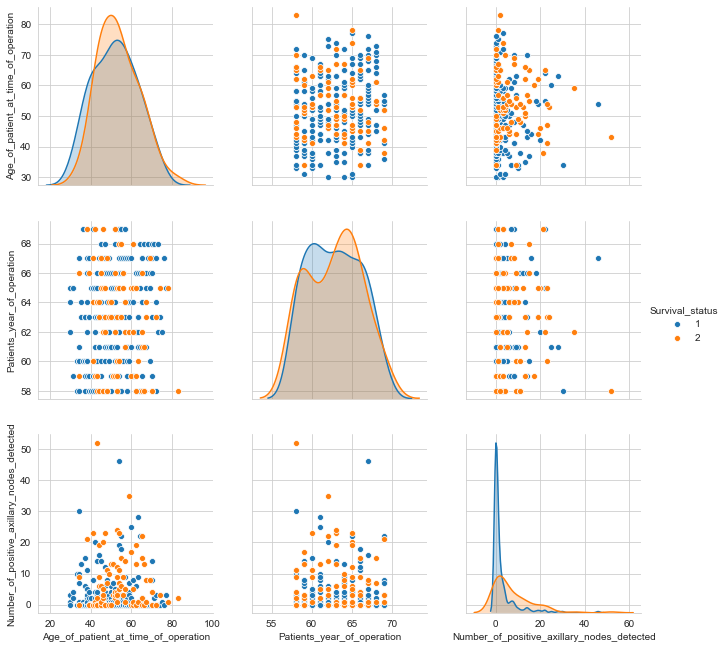

In [6]:
#pairplot
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_status", size=3);
plt.show()

**Observation:-**
1)from the plots above plot 3 and 7 shows siginificant sepration among the two plots i.e Age of patients vs Number of auxillary nodes
will do univariate analysis of age of the patients and number of auxillary nodes

In [27]:
haberman['Age_of_patient_at_time_of_operation'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

C:\Users\Dell\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


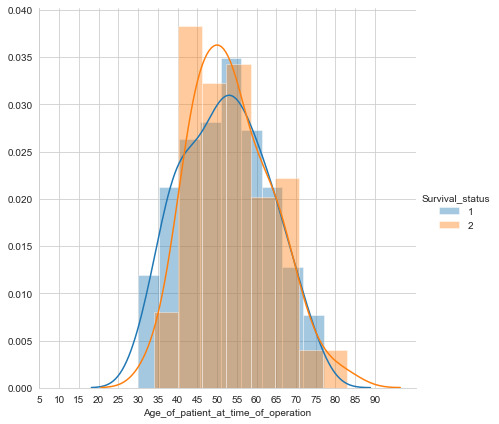

In [7]:
#pdf plot
#univariate analysis--Age_of_patient_at_time _of_operation
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival_status", size=6) \
   .map(sns.distplot, "Age_of_patient_at_time_of_operation") \
   .add_legend();
plt.xticks(np.arange(5,95,5))
plt.show();


**Observation:-**
1)patients undergone operation at the age of <=34 have always more life span
2)patients undergone operation above 76 years of age have life span less than 5 years
3)Between age range 35-40 there is more probability of long survival
4)Between age range 40-46 there is more probability of short survival

In [8]:
haberman['Patients_year_of_operation'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

C:\Users\Dell\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


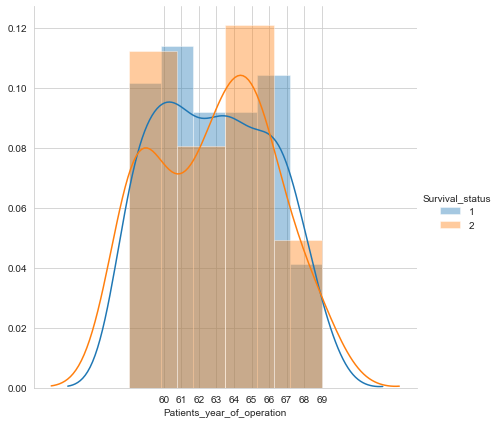

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival_status", size=6) \
   .map(sns.distplot, "Patients_year_of_operation") \
   .add_legend();
plt.xticks(np.arange(60,70,1))
plt.show();


In [10]:
haberman['Number_of_positive_axillary_nodes_detected'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

C:\Users\Dell\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


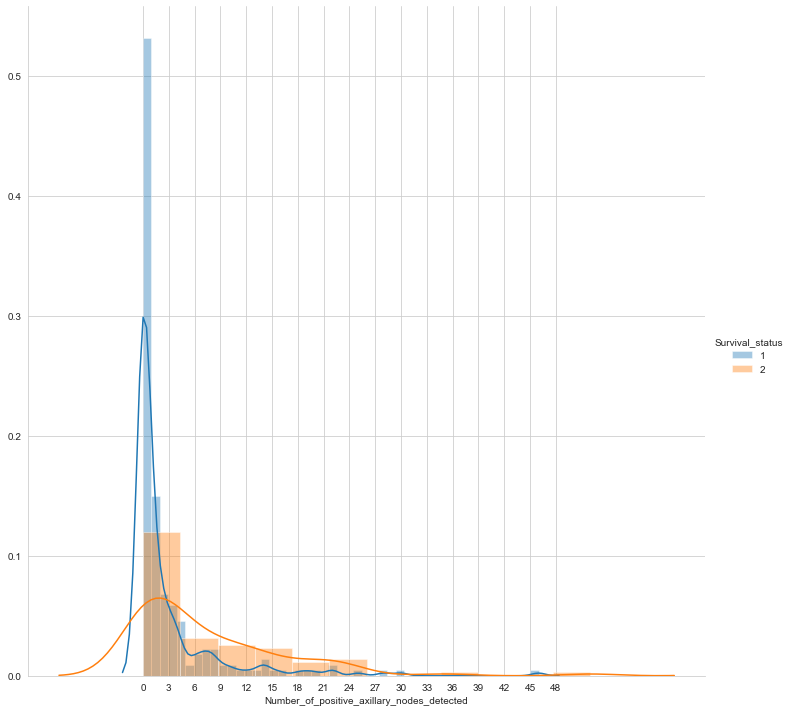

In [45]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival_status", size=10) \
   .map(sns.distplot, "Number_of_positive_axillary_nodes_detected") \
   .add_legend()
plt.xticks(np.arange(0,50,3))
plt.show()


**Observation:-**
1)patients having auxillary nodes <0 always have life span >=5 years
2)patients having auxillary node less than or upto 3 have higher life span.
3)patients having auxillary nodes 47 always show survival status 2 i.e shorter life span.

In [12]:
s_1=haberman[haberman['Survival_status']==1]
s_2=haberman[haberman['Survival_status']==2]
print(s_1.head())

   Age_of_patient_at_time_of_operation  Patients_year_of_operation  \
0                                   30                          64   
1                                   30                          62   
2                                   30                          65   
3                                   31                          59   
4                                   31                          65   

   Number_of_positive_axillary_nodes_detected  Survival_status  
0                                           1                1  
1                                           3                1  
2                                           0                1  
3                                           2                1  
4                                           4                1  


No handles with labels found to put in legend.


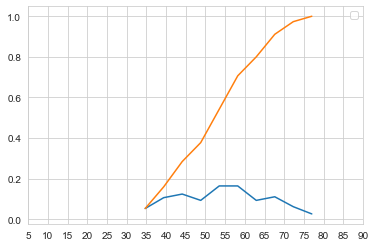

In [24]:
#survival more than or upto five years--1 
counts,bin_edges=np.histogram(s_1['Age_of_patient_at_time_of_operation'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xticks(np.arange(5,95,5))
plt.legend()


No handles with labels found to put in legend.


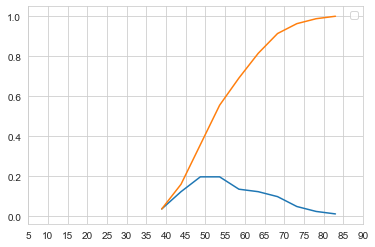

In [25]:
#survival less than five years--2 
counts,edges=np.histogram(s_2['Age_of_patient_at_time_of_operation'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.xticks(np.arange(5,95,5))
plt.legend()

**Observation**:-
1)paitents having age <=76 will exhibit survival status 1
2)Patients having age <=83 will exhibits survival status 2
3)paitents having age <=65 will exhibit survival status 1 with 85 % chances.


0    1
1    3
2    0
3    2
4    4
Name: Number_of_positive_axillary_nodes_detected, dtype: int64


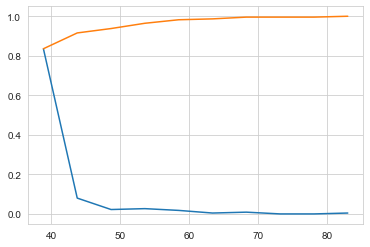

In [51]:
#survival more than or upto five years--1 
counts,bin_edges=np.histogram(s_1['Number_of_positive_axillary_nodes_detected'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
print(s_1['Number_of_positive_axillary_nodes_detected'].head())
#print(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
#plt.xlim(0,30)
#plt.xticks(np.arange(0,50,3))
#plt.legend()


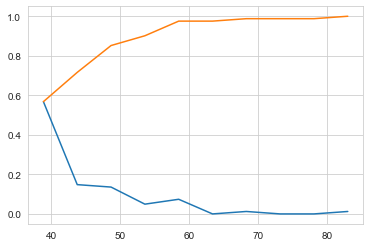

In [47]:
#survival less than five years--2 
counts,bin_edges=np.histogram(s_2['Number_of_positive_axillary_nodes_detected'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
#plt.xticks(np.arange(0,50,3))
#plt.legend()

In [53]:
print("Medians:")
print(np.median(s_1['Number_of_positive_axillary_nodes_detected']))
print(np.median(s_2['Number_of_positive_axillary_nodes_detected']))
print("\nQuantiles:")
print(np.percentile(s_1['Number_of_positive_axillary_nodes_detected'],np.arange(0,100,25)))
print(np.percentile(s_2['Number_of_positive_axillary_nodes_detected'],np.arange(0,100,25)))
print("\n90th percentile:")
print(np.percentile(s_1['Number_of_positive_axillary_nodes_detected'],90))
print(np.percentile(s_2['Number_of_positive_axillary_nodes_detected'],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(s_1['Number_of_positive_axillary_nodes_detected']))
print(robust.mad(s_2['Number_of_positive_axillary_nodes_detected']))

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


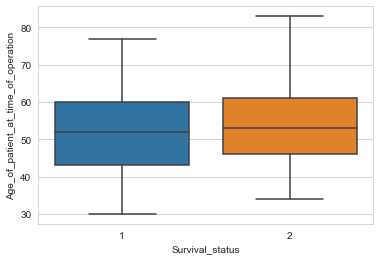

In [17]:
sns.boxplot(x="Survival_status",y="Age_of_patient_at_time_of_operation",data=haberman)
plt.show()

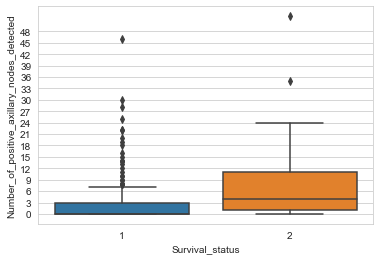

In [50]:
sns.boxplot(x="Survival_status",y="Number_of_positive_axillary_nodes_detected",data=haberman)
plt.yticks(np.arange(0,50,3))
plt.show()

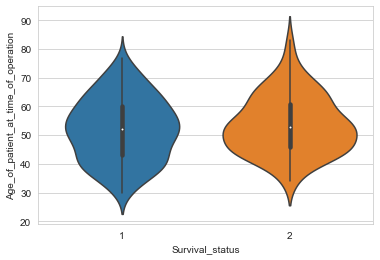

In [19]:
sns.violinplot(x="Survival_status",y="Age_of_patient_at_time_of_operation",data=haberman)
plt.show()

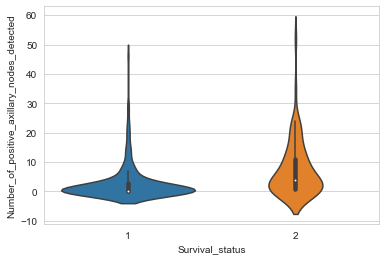

In [20]:
sns.violinplot(x="Survival_status",y="Number_of_positive_axillary_nodes_detected",data=haberman)
plt.show()

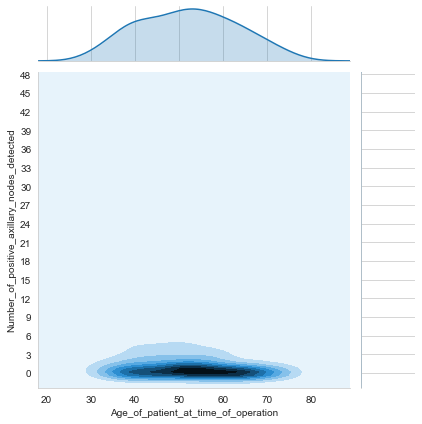

<Figure size 360x1440 with 0 Axes>

In [38]:
#multivariate plot--2d density plot
sns.jointplot(x="Age_of_patient_at_time_of_operation", y="Number_of_positive_axillary_nodes_detected", data=s_1, kind="kde");
plt.xticks(np.arange(5,95,5))
plt.yticks(np.arange(0,50,3))
plt.figure(figsize=(5,20))
plt.show();



**Observation:-**
1)Patient having age between 47 to 60 with auxillary node less than 3 has higher survival chances 